TASK-1

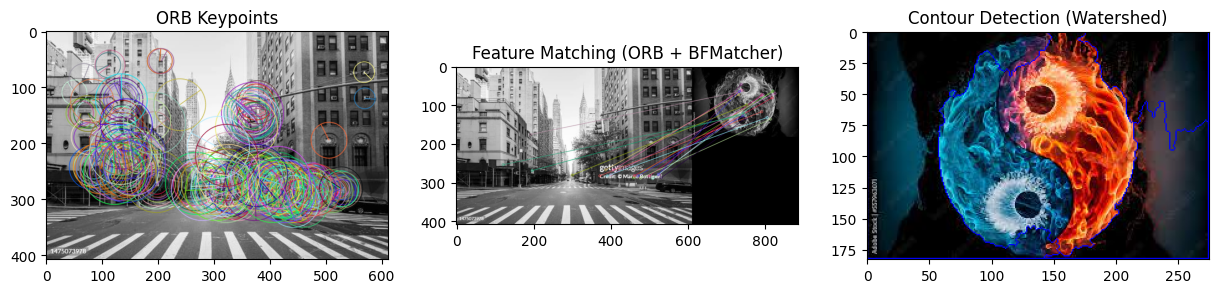

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread("/content/street.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("/content/yin-yan.jpeg", cv2.IMREAD_GRAYSCALE)
color_img = cv2.imread("/content/yin-yan.jpeg")

orb = cv2.ORB_create()
keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

orb_img = cv2.drawKeypoints(img1, keypoints1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)
matches = sorted(matches, key=lambda x: x.distance)

feature_match_img = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:20], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

gray = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

sure_bg = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

cv2.watershed(color_img, markers)
color_img[markers == -1] = [255, 0, 0]

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(orb_img, cmap="gray")
plt.title("ORB Keypoints")

plt.subplot(1, 3, 2)
plt.imshow(feature_match_img)
plt.title("Feature Matching (ORB + BFMatcher)")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB))
plt.title("Contour Detection (Watershed)")

plt.show()


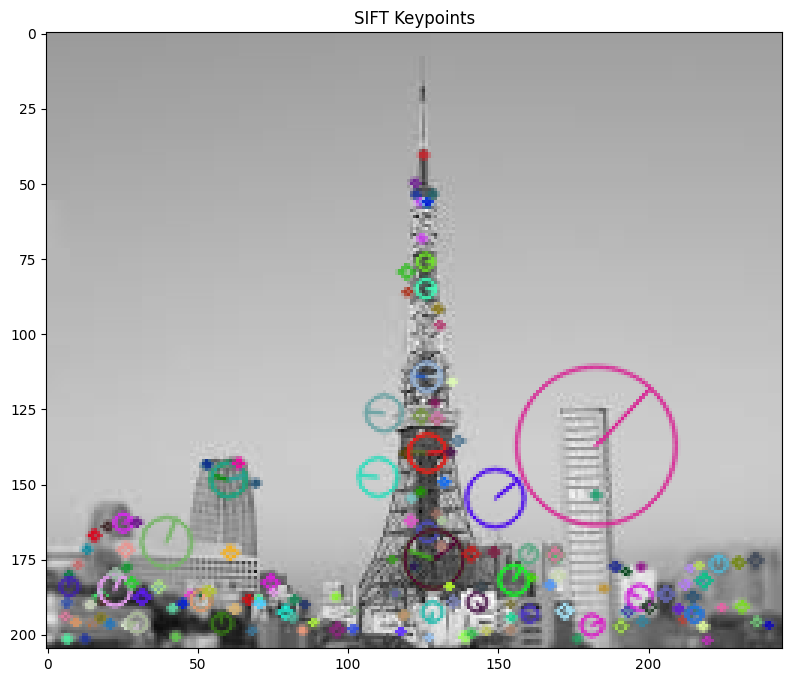

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load an image
img = cv.imread('/content/p2.jpeg', cv.IMREAD_GRAYSCALE)

# Create SIFT detector
sift = cv.SIFT_create()

# Detect keypoints
keypoints = sift.detect(img, None)

# Compute descriptors
keypoints, descriptors = sift.detectAndCompute(img, None)

# Draw keypoints
img_with_keypoints = cv.drawKeypoints(img, keypoints, None,
                                     flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the result
plt.figure(figsize=(10, 8))
plt.imshow(img_with_keypoints)
plt.title('SIFT Keypoints')
plt.show()

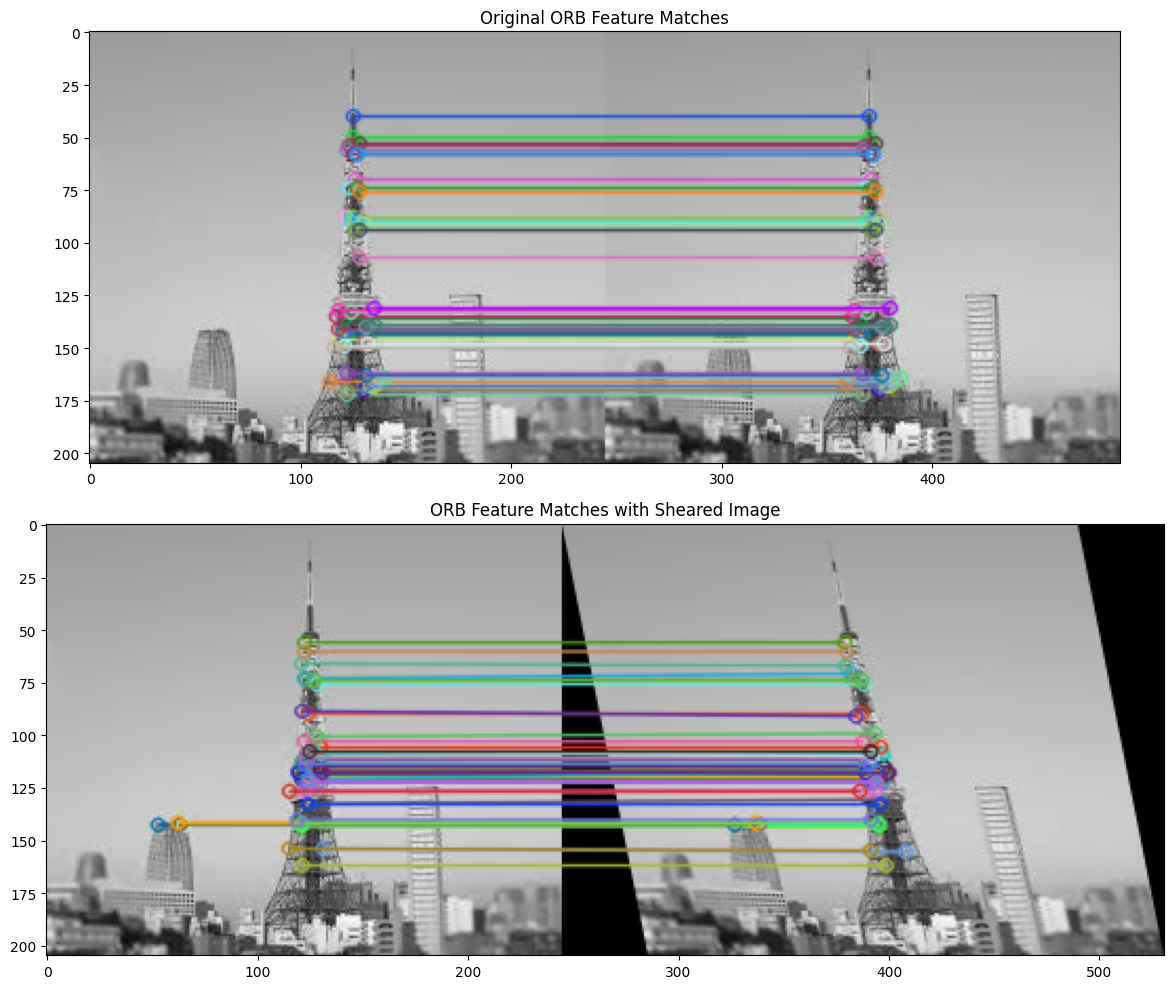

Original image 1: 304 keypoints
Original image 2: 304 keypoints
Sheared image 2: 294 keypoints
Original matching - good matches ratio: 50/304
Sheared matching - good matches ratio: 50/294


In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load two images to match
img1 = cv.imread('/content/p2.jpeg', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('/content/p2.jpeg', cv.IMREAD_GRAYSCALE)

# Get dimensions of img2
height, width = img2.shape

# Define shear matrix - adjust the 0.2 value to control the amount of shear
shear_factor = 0.2
M = np.float32([[1, shear_factor, 0],
                [0, 1, 0]])

# Apply shear transformation to img2
img2_sheared = cv.warpAffine(img2, M, (int(width + height*shear_factor), height))

# Initialize ORB detector
orb = cv.ORB_create()

# Find keypoints and descriptors for original img1 and sheared img2
kp1, des1 = orb.detectAndCompute(img1, None)
kp2_sheared, des2_sheared = orb.detectAndCompute(img2_sheared, None)

# Create BFMatcher (Brute Force Matcher) object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# Match descriptors
matches = bf.match(des1, des2_sheared)

# Sort them in order of their distance (lower distance = better match)
matches = sorted(matches, key=lambda x: x.distance)

# Draw first 50 matches
img_matches = cv.drawMatches(img1, kp1, img2_sheared, kp2_sheared, matches[:50], None,
                           flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# For comparison, let's also do matching with the original (non-sheared) image
kp2_orig, des2_orig = orb.detectAndCompute(img2, None)
matches_orig = bf.match(des1, des2_orig)
matches_orig = sorted(matches_orig, key=lambda x: x.distance)
img_matches_orig = cv.drawMatches(img1, kp1, img2, kp2_orig, matches_orig[:50], None,
                                flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the results
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.imshow(img_matches_orig)
plt.title('Original ORB Feature Matches')

plt.subplot(2, 1, 2)
plt.imshow(img_matches)
plt.title('ORB Feature Matches with Sheared Image')

plt.tight_layout()
plt.show()

# Print statistics about number of keypoints and good matches
print(f"Original image 1: {len(kp1)} keypoints")
print(f"Original image 2: {len(kp2_orig)} keypoints")
print(f"Sheared image 2: {len(kp2_sheared)} keypoints")
print(f"Original matching - good matches ratio: {len(matches_orig[:50])}/{min(len(kp1), len(kp2_orig))}")
print(f"Sheared matching - good matches ratio: {len(matches[:50])}/{min(len(kp1), len(kp2_sheared))}")

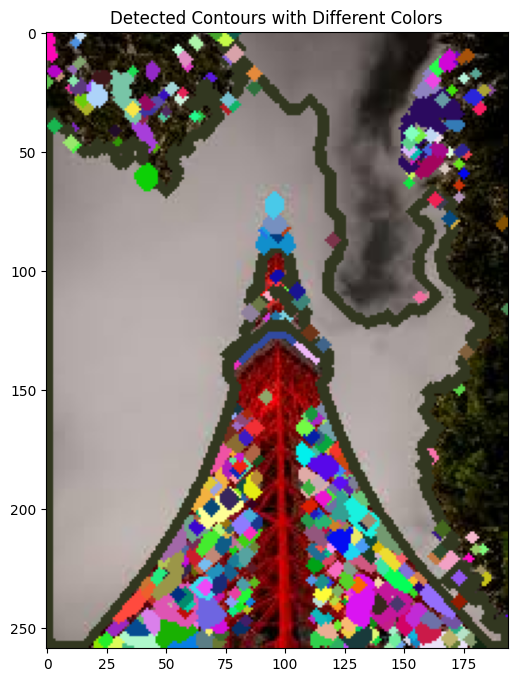

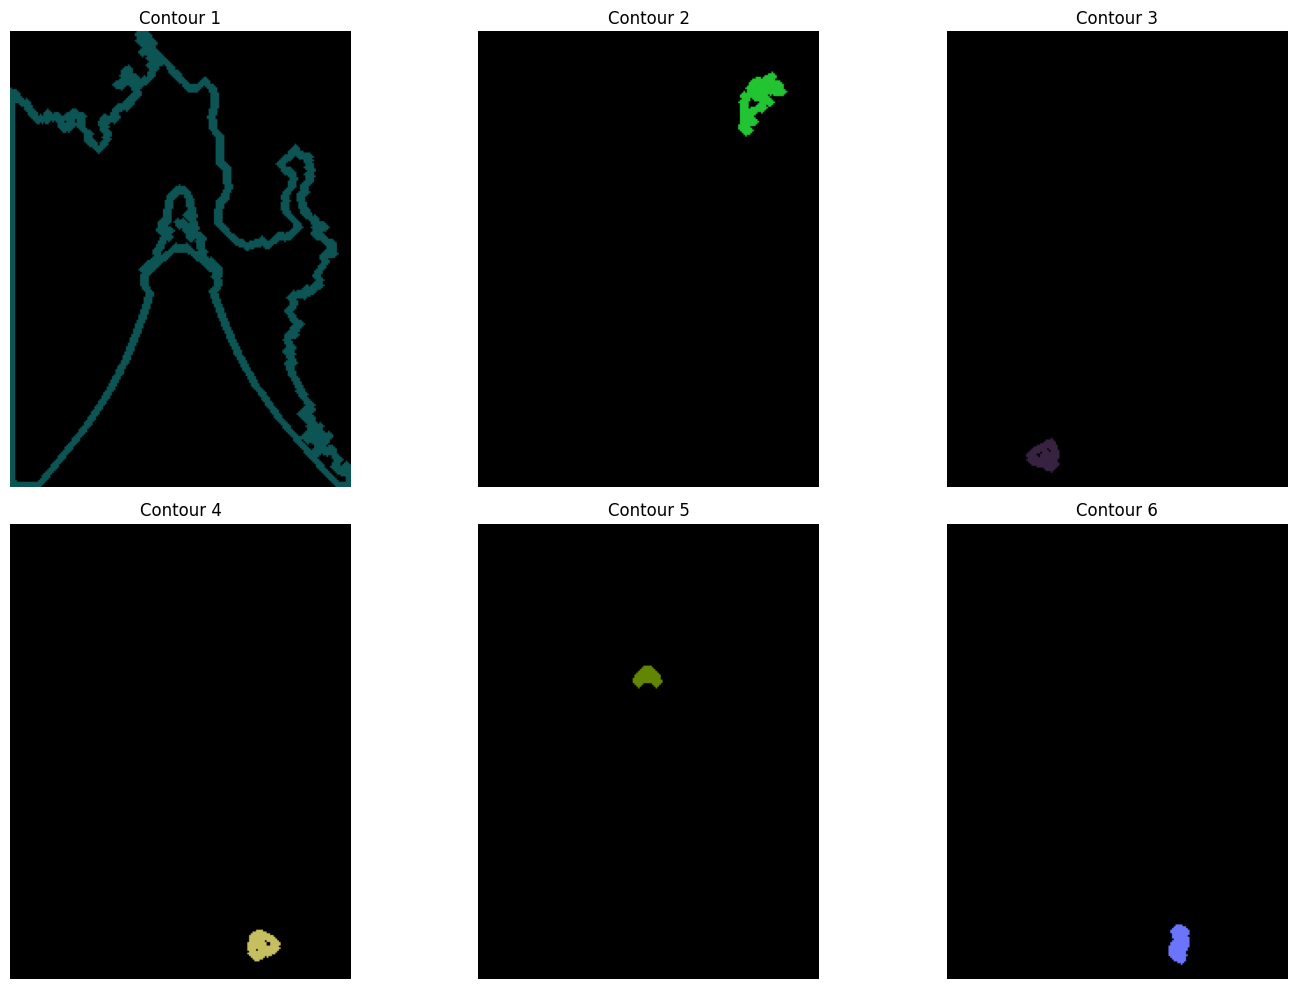

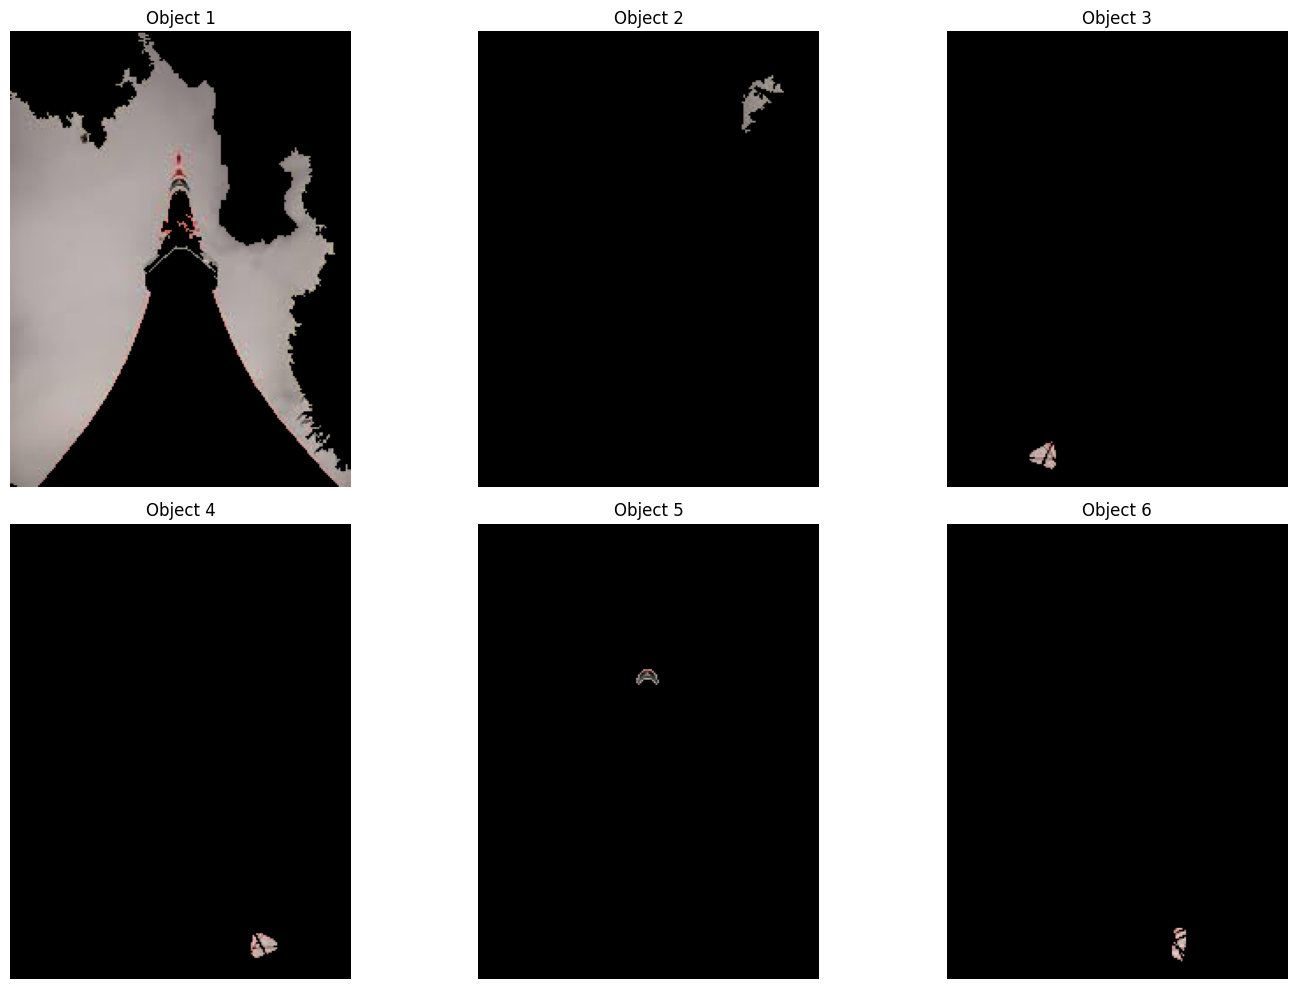

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import random

# Load image and convert to grayscale
img = cv.imread('/content/p1.jpeg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Apply threshold or edge detection
ret, thresh = cv.threshold(gray, 127, 255, 0)
# Alternatively: edges = cv.Canny(gray, 50, 150)

# Find contours
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# Create a copy of the original image
img_contours = img.copy()

# Draw all contours with different random colors
for i, contour in enumerate(contours):
    # Generate a random color for each contour
    color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

    # Draw the contour with the random color
    cv.drawContours(img_contours, [contour], -1, color, 3)

# Convert BGR to RGB for matplotlib
img_contours_rgb = cv.cvtColor(img_contours, cv.COLOR_BGR2RGB)

# Display results
plt.figure(figsize=(10, 8))
plt.imshow(img_contours_rgb)
plt.title('Detected Contours with Different Colors')
plt.show()

# Optional: Display individual contours separately
# Only show the largest contours (to avoid too many small ones)
sorted_contours = sorted(contours, key=cv.contourArea, reverse=True)[:6]  # Get the 6 largest contours

# Create a figure with subplots for individual contours
plt.figure(figsize=(15, 10))
for i, contour in enumerate(sorted_contours):
    # Create blank image for this contour
    contour_img = np.zeros_like(img)

    # Generate a random color
    color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

    # Draw only this contour
    cv.drawContours(contour_img, [contour], -1, color, 3)

    # Create a subplot
    plt.subplot(2, 3, i+1)
    plt.imshow(cv.cvtColor(contour_img, cv.COLOR_BGR2RGB))
    plt.title(f'Contour {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Optional: Extract each object using the contour as a mask
plt.figure(figsize=(15, 10))
for i, contour in enumerate(sorted_contours):
    # Create a mask for this contour
    mask = np.zeros(gray.shape, dtype=np.uint8)
    cv.drawContours(mask, [contour], -1, 255, -1)  # Fill the contour with white

    # Apply mask to extract the object
    result = np.zeros_like(img)
    result[mask == 255] = img[mask == 255]

    # Create a subplot
    plt.subplot(2, 3, i+1)
    plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
    plt.title(f'Object {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

RESNET34

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.models import resnet34, ResNet34_Weights
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ResNet requires 224x224 input
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5071, 0.4867, 0.4408], std=[0.2675, 0.2565, 0.2761])
])


train_dataset = torchvision.datasets.CIFAR100(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.CIFAR100(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4)


model = resnet34(weights=ResNet34_Weights.IMAGENET1K_V1)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 100)  # CIFAR-100 has 100 classes
model = model.to(device)

100%|██████████| 169M/169M [00:30<00:00, 5.56MB/s]
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 154MB/s]


In [ ]:
for param in model.parameters():
    param.requires_grad = False
for param in model.fc.parameters():
    param.requires_grad = True

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

num_epochs = 10
train_losses, train_accuracies = [], []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0

    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")

    for images, labels in progress_bar:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

        progress_bar.set_postfix(loss=running_loss / len(train_loader))

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = correct / total

    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")

Epoch 1/10: 100%|██████████| 782/782 [02:18<00:00,  5.67it/s, loss=2.28]


Epoch [1/10], Loss: 2.2758, Accuracy: 0.4504


Epoch 2/10: 100%|██████████| 782/782 [02:12<00:00,  5.92it/s, loss=1.54]


Epoch [2/10], Loss: 1.5434, Accuracy: 0.5796


Epoch 3/10: 100%|██████████| 782/782 [02:05<00:00,  6.22it/s, loss=1.42]


Epoch [3/10], Loss: 1.4198, Accuracy: 0.6060


Epoch 4/10: 100%|██████████| 782/782 [02:04<00:00,  6.28it/s, loss=1.36]


Epoch [4/10], Loss: 1.3605, Accuracy: 0.6195


Epoch 5/10: 100%|██████████| 782/782 [01:55<00:00,  6.75it/s, loss=1.32]


Epoch [5/10], Loss: 1.3232, Accuracy: 0.6279


Epoch 6/10: 100%|██████████| 782/782 [01:55<00:00,  6.79it/s, loss=1.29]


Epoch [6/10], Loss: 1.2936, Accuracy: 0.6361


Epoch 7/10: 100%|██████████| 782/782 [01:56<00:00,  6.74it/s, loss=1.27]


Epoch [7/10], Loss: 1.2701, Accuracy: 0.6396


Epoch 8/10: 100%|██████████| 782/782 [01:57<00:00,  6.67it/s, loss=1.26]


Epoch [8/10], Loss: 1.2553, Accuracy: 0.6460


Epoch 9/10: 100%|██████████| 782/782 [01:56<00:00,  6.71it/s, loss=1.24]


Epoch [9/10], Loss: 1.2354, Accuracy: 0.6506


Epoch 10/10: 100%|██████████| 782/782 [01:55<00:00,  6.79it/s, loss=1.22]

Epoch [10/10], Loss: 1.2240, Accuracy: 0.6517


In [ ]:
model.eval()
all_preds, all_labels, all_probs = [], [], []
correct, total = 0, 0

progress_bar = tqdm(test_loader, desc="Evaluating")

with torch.no_grad():
    for images, labels in progress_bar:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)  # Compute class probabilities
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

        correct += (preds == labels).sum().item()
        total += labels.size(0)

test_accuracy = correct / total

Evaluating: 100%|██████████| 157/157 [00:22<00:00,  6.86it/s]


In [ ]:
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='macro')
recall = recall_score(all_labels, all_preds, average='macro')
f1 = f1_score(all_labels, all_preds, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.6109
Precision: 0.6334
Recall: 0.6109
F1-Score: 0.6090


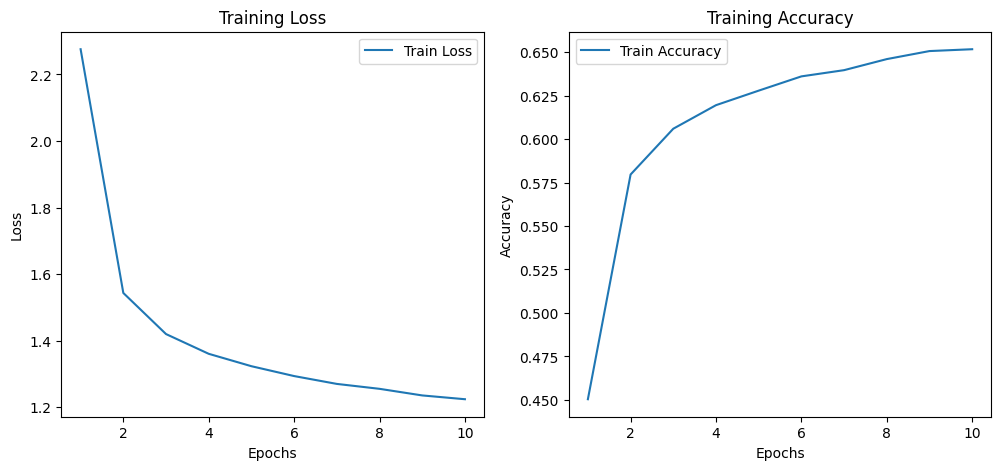

In [ ]:
epochs_range = range(1, num_epochs + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, label="Train Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracies, label="Train Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy")
plt.legend()

plt.show()

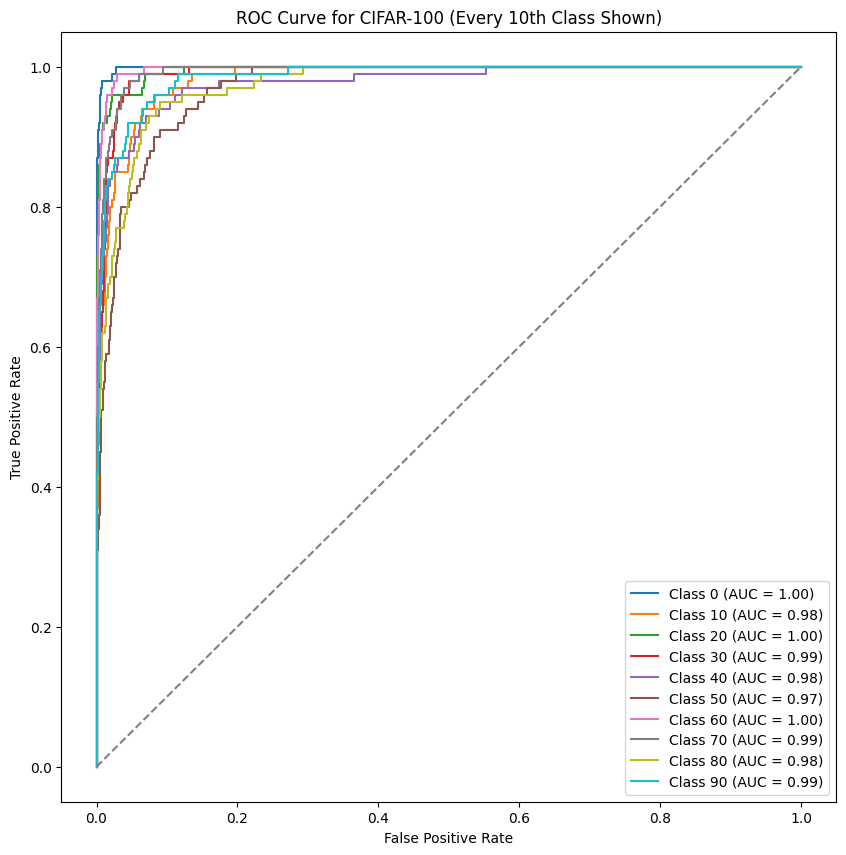

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Number of classes (CIFAR-100)
num_classes = 100

# Convert labels to one-hot encoding
all_labels_one_hot = np.eye(num_classes)[all_labels]
all_probs = np.array(all_probs)  # Ensure predictions are in array format

# Plot ROC Curves for all 100 classes
plt.figure(figsize=(10, 10))

for i in range(num_classes):
    fpr, tpr, _ = roc_curve(all_labels_one_hot[:, i], all_probs[:, i])
    roc_auc = auc(fpr, tpr)

    # Plot every 10th class to avoid overcrowding
    if i % 10 == 0:
        plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

# Random guess line
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")

# Plot settings
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for CIFAR-100 (Every 10th Class Shown)")
plt.legend()
plt.show()


RESNET18

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.models import resnet18, ResNet18_Weights
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ResNet requires 224x224 input
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5071, 0.4867, 0.4408], std=[0.2675, 0.2565, 0.2761])
])

In [ ]:
train_dataset = torchvision.datasets.CIFAR100(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.CIFAR100(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4)

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [ ]:
model = resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 100)  # CIFAR-100 has 100 classes
model = model.to(device)


for param in model.parameters():
    param.requires_grad = False
for param in model.fc.parameters():
    param.requires_grad = True


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 207MB/s]


In [ ]:
num_epochs = 10
train_losses, train_accuracies = [], []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0

    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")

    for images, labels in progress_bar:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

        progress_bar.set_postfix(loss=running_loss / len(train_loader))

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = correct / total

    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")

Epoch 1/10: 100%|██████████| 782/782 [01:37<00:00,  8.06it/s, loss=2.37]


Epoch [1/10], Loss: 2.3722, Accuracy: 0.4290


Epoch 2/10: 100%|██████████| 782/782 [01:39<00:00,  7.88it/s, loss=1.63]


Epoch [2/10], Loss: 1.6322, Accuracy: 0.5590


Epoch 3/10: 100%|██████████| 782/782 [01:36<00:00,  8.12it/s, loss=1.5]


Epoch [3/10], Loss: 1.5034, Accuracy: 0.5865


Epoch 4/10: 100%|██████████| 782/782 [01:38<00:00,  7.98it/s, loss=1.44]


Epoch [4/10], Loss: 1.4371, Accuracy: 0.6015


Epoch 5/10: 100%|██████████| 782/782 [01:37<00:00,  8.06it/s, loss=1.39]


Epoch [5/10], Loss: 1.3913, Accuracy: 0.6090


Epoch 6/10: 100%|██████████| 782/782 [01:37<00:00,  8.01it/s, loss=1.36]


Epoch [6/10], Loss: 1.3603, Accuracy: 0.6185


Epoch 7/10: 100%|██████████| 782/782 [01:36<00:00,  8.10it/s, loss=1.34]


Epoch [7/10], Loss: 1.3359, Accuracy: 0.6255


Epoch 8/10: 100%|██████████| 782/782 [01:38<00:00,  7.98it/s, loss=1.32]


Epoch [8/10], Loss: 1.3192, Accuracy: 0.6268


Epoch 9/10: 100%|██████████| 782/782 [01:38<00:00,  7.95it/s, loss=1.3]


Epoch [9/10], Loss: 1.3022, Accuracy: 0.6298


Epoch 10/10: 100%|██████████| 782/782 [01:38<00:00,  7.96it/s, loss=1.29]

Epoch [10/10], Loss: 1.2902, Accuracy: 0.6344


In [ ]:
model.eval()
all_preds, all_labels, all_probs = [], [], []
correct, total = 0, 0

progress_bar = tqdm(test_loader, desc="Evaluating")

with torch.no_grad():
    for images, labels in progress_bar:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)  # Compute class probabilities
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

        correct += (preds == labels).sum().item()
        total += labels.size(0)

test_accuracy = correct / total

Evaluating: 100%|██████████| 157/157 [00:20<00:00,  7.77it/s]


In [ ]:
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='macro')
recall = recall_score(all_labels, all_preds, average='macro')
f1 = f1_score(all_labels, all_preds, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.5818
Precision: 0.6043
Recall: 0.5818
F1-Score: 0.5798


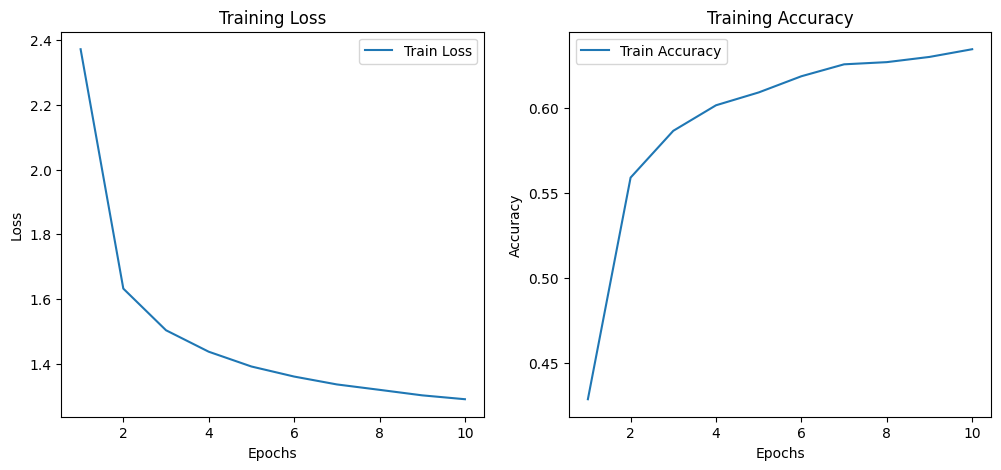

In [ ]:
epochs_range = range(1, num_epochs + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, label="Train Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracies, label="Train Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy")
plt.legend()

plt.show()

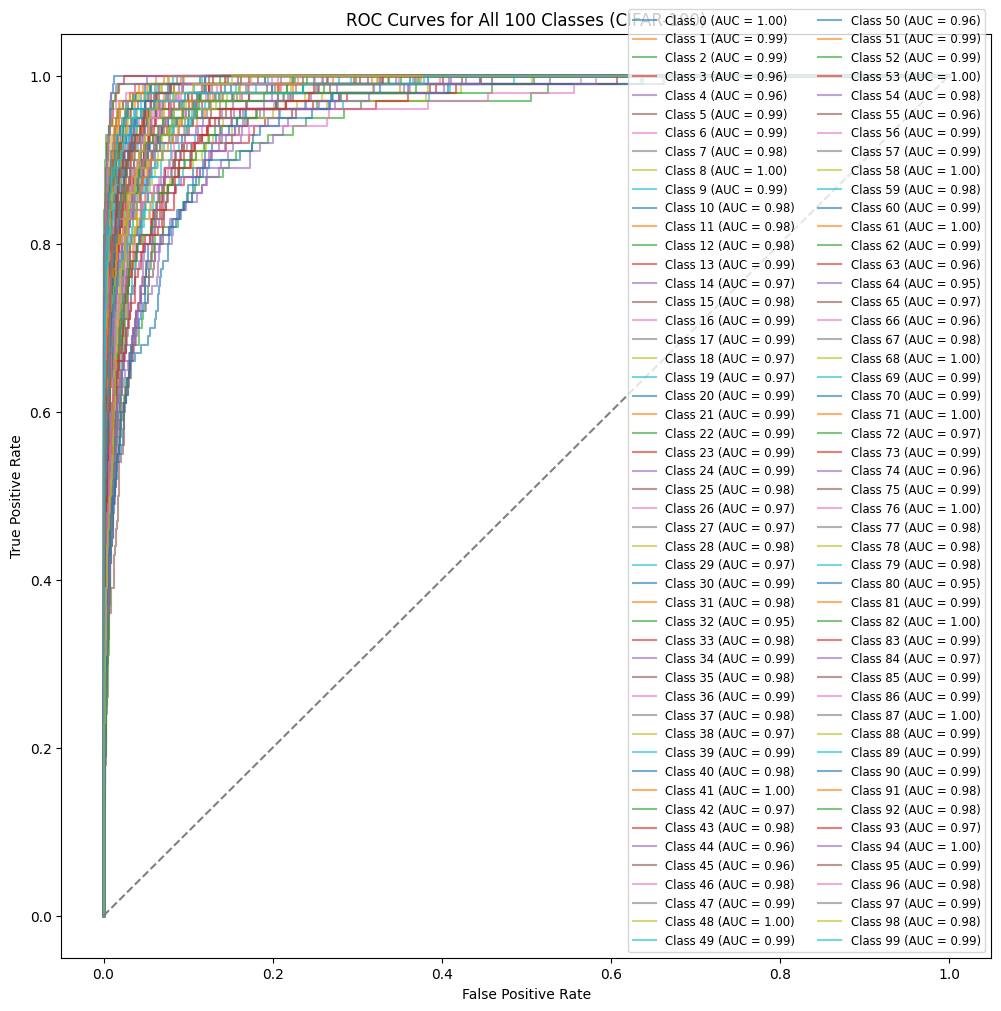

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Number of classes (CIFAR-100)
num_classes = 100

# Convert labels to one-hot encoding
all_labels_one_hot = np.eye(num_classes)[all_labels]
all_probs = np.array(all_probs)  # Ensure predictions are in array format

# Initialize the figure
plt.figure(figsize=(12, 12))

# Compute ROC for all 100 classes
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(all_labels_one_hot[:, i], all_probs[:, i])
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve for each class
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})", alpha=0.6)

# Random guess line (y = x)
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")

# Plot settings
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All 100 Classes (CIFAR-100)")
plt.legend(fontsize="small", loc="lower right", ncol=2)
plt.show()

MetaLearning Pipeline

In [ ]:
import torch
import random
import torchvision
import torchvision.transforms as transforms
import numpy as np
import cv2


transform = transforms.Compose([transforms.ToTensor()])
mnist_data = torchvision.datasets.MNIST(root="./data", train=True, download=True, transform=transform)

100%|██████████| 9.91M/9.91M [00:01<00:00, 5.09MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 65.5kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.26MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.30MB/s]


In [ ]:
images = mnist_data.data.float() / 255.0
labels = mnist_data.targets


alpha = 10
sigma = 3


random_state = np.random.RandomState(None)
dx = cv2.GaussianBlur((random_state.rand(28, 28) * 2 - 1), (3, 3), sigma) * alpha
dy = cv2.GaussianBlur((random_state.rand(28, 28) * 2 - 1), (3, 3), sigma) * alpha
x, y = np.meshgrid(np.arange(28), np.arange(28))
map_x = np.float32(x + dx)
map_y = np.float32(y + dy)

In [ ]:
for i in range(len(images)):
    images[i] = torch.tensor(cv2.remap(images[i].numpy(), map_x, map_y, interpolation=cv2.INTER_LINEAR))


train_size = int(0.8 * len(images))
test_size = len(images) - train_size
train_images, test_images = images[:train_size], images[train_size:]
train_labels, test_labels = labels[:train_size], labels[train_size:]


N = 5  # Number of classes per episode
K = 5  # Number of support samples per class
Q = 3  # Number of query samples per class


selected_classes = random.sample(range(10), N)


support_images, support_labels = [], []
query_images, query_labels = [], []

In [ ]:
for cls in selected_classes:
    class_indices = torch.where(train_labels == cls)[0]
    selected_samples = torch.randperm(len(class_indices))

    support_indices = class_indices[selected_samples[:K]]
    query_indices = class_indices[selected_samples[K:K+Q]]

    support_images.append(train_images[support_indices])
    support_labels.append(torch.full((K,), cls))
    query_images.append(train_images[query_indices])
    query_labels.append(torch.full((Q,), cls))

FEW SHOT LEARNING MODEL

In [ ]:
support_images = torch.cat(support_images, dim=0)
support_labels = torch.cat(support_labels)
query_images = torch.cat(query_images, dim=0)
query_labels = torch.cat(query_labels)

In [ ]:
support_images = support_images.view(support_images.shape[0], -1)  # Shape: (N*K, 784)
query_images = query_images.view(query_images.shape[0], -1)  # Shape: (N*Q, 784)

In [ ]:
prototypes = []
prototype_labels = torch.tensor(selected_classes)  # Track labels

for cls in selected_classes:
    class_indices = torch.where(support_labels == cls)[0]
    if class_indices.numel() == 0:
        continue
    class_prototype = support_images[class_indices].mean(dim=0)
    prototypes.append(class_prototype)

prototypes = torch.stack(prototypes)

In [ ]:
query_distances = []
for i in range(len(query_images)):
    distances = torch.norm(prototypes - query_images[i].unsqueeze(0), dim=1)
    predicted_class = prototype_labels[torch.argmin(distances)].item()  # Map to actual label
    query_distances.append(predicted_class)

correct = (torch.tensor(query_distances) == query_labels).sum().item()
accuracy = correct / len(query_labels) * 100
print(f"Prototypical Network Accuracy: {accuracy:.2f}%")

Prototypical Network Accuracy: 73.33%


SIAMESE NETWORK

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
feature_extractor = nn.Sequential(
    nn.Conv2d(1, 64, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.Conv2d(64, 128, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.Conv2d(128, 256, kernel_size=3, padding=1),
    nn.ReLU()
)

In [ ]:
fc = nn.Linear(256 * 28 * 28, 128)

In [ ]:
support_embeddings = []
query_embeddings = []

In [ ]:
for img in support_images:
    img = img.unsqueeze(0).unsqueeze(0)
    x = feature_extractor(img)
    x = x.view(1, -1)
    embedding = fc(x)
    support_embeddings.append(embedding)

for img in query_images:
    img = img.unsqueeze(0).unsqueeze(0)
    x = feature_extractor(img)
    x = x.view(1, -1)
    embedding = fc(x)
    query_embeddings.append(embedding)

support_embeddings = torch.cat(support_embeddings)
query_embeddings = torch.cat(query_embeddings)

In [ ]:
prototypes = []
for cls in selected_classes:
    indices = torch.where(support_labels == cls)[0]
    class_prototype = support_embeddings[indices].mean(dim=0)
    prototypes.append(class_prototype)

In [ ]:
prototypes = torch.stack(prototypes)


query_distances = []
for i in range(len(query_embeddings)):
    distances = torch.norm(prototypes - query_embeddings[i].unsqueeze(0), dim=1)
    predicted_class = selected_classes[torch.argmin(distances).item()]
    query_distances.append(predicted_class)

query_distances = torch.tensor(query_distances)
correct = (query_distances == query_labels).sum().item()
accuracy = correct / len(query_labels) * 100
print(f"Siamese Network Accuracy: {accuracy:.2f}%")

Siamese Network Accuracy: 73.33%


MATCHING NETWORK

In [ ]:
cosine_similarities = torch.nn.functional.cosine_similarity(
    support_embeddings.unsqueeze(0),
    query_embeddings.unsqueeze(1),
    dim=2
)

cosine_similarities = cosine_similarities.view(len(query_embeddings), len(selected_classes), K).mean(dim=2)

predicted_indices = torch.argmax(cosine_similarities, dim=1)
query_predictions = torch.tensor([selected_classes[i] for i in predicted_indices])

correct = (query_predictions == query_labels).sum().item()
accuracy = correct / len(query_labels) * 100
print(f"Matching Network Accuracy: {accuracy:.2f}%")


Matching Network Accuracy: 60.00%


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

y_true = query_labels.cpu().numpy()

y_pred_proto = np.array(query_distances)
y_pred_siamese = np.array(query_distances)
y_pred_matching = query_predictions.clone().detach().cpu().numpy()

precision_proto = precision_score(y_true, y_pred_proto, average='macro')
recall_proto = recall_score(y_true, y_pred_proto, average='macro')
f1_proto = f1_score(y_true, y_pred_proto, average='macro')

print(f"Prototypical Networks - Precision: {precision_proto:.2f}, Recall: {recall_proto:.2f}, F1-score: {f1_proto:.2f}")

Prototypical Networks - Precision: 0.73, Recall: 0.73, F1-score: 0.72
